## Importing the necessary libraries

In [120]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to use regular expressions for manipulating text data
import re

# to load the natural language toolkit
import nltk
nltk.download('stopwords')    # loading the stopwords
nltk.download('wordnet')    # loading the wordnet module that is used in stemming

# to remove common stop words
from nltk.corpus import stopwords

# to perform stemming
from nltk.stem.porter import PorterStemmer

# to create Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# to import Word2Vec
from gensim.models import Word2Vec

# to split data into train and test sets
from sklearn.model_selection import train_test_split

# to build a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# to compute metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# To tune different models
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading the dataset

In [121]:
#rom google.colab import drive
#drive.mount('/content/drive')

In [122]:
# loading data into a pandas dataframe
reviews = pd.read_excel("/kaggle/input/dataset2/DataSet-industrial_safety_and_health_database_with_accidents_description.xlsx")

In [123]:
# creating a copy of the data
data = reviews.copy()

## Data Overview

### Checking the first five rows of the data

In [124]:
data.head(5)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo."
1,1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter."
2,2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury."
3,3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury."
4,4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,"Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described."


### Checking the shape of the dataset

In [125]:
data.shape

(425, 11)

* The dataset has 1007 rows and 3 columns.

### Checking for Missing Values

In [126]:
data.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

* There are no missing values in the data

### Checking for duplicate values

In [127]:
# checking for duplicate values
data.duplicated().sum()

0

* There are 2 duplicate values in the dataset.
* We'll drop them.

In [128]:
# dropping duplicate values
data = data.drop_duplicates()

data.duplicated().sum()

0

## Exploratory Data Analysis (EDA)


In [129]:
 # function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Distribution of sentiments

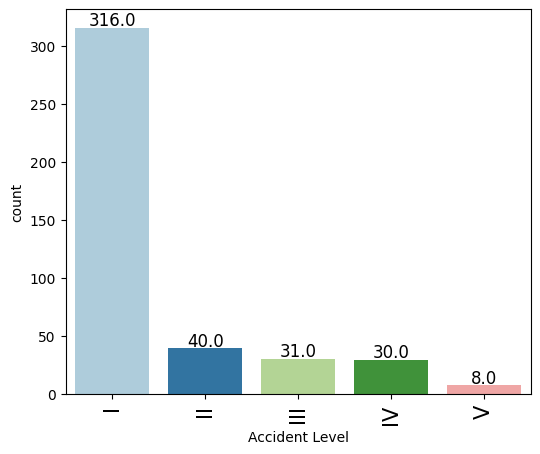

In [130]:
labeled_barplot(data, "Accident Level")

- Majority of the reviews are positive (\~85%), followed by neutral reviews (8%), and then the positive reviews (\~7%)

In [261]:

# check version number
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

0.12.3


## Text Preprocessing

### Removing special characters from the text

In [131]:
# defining a function to remove special characters
def remove_special_characters(text):
    # Defining the regex pattern to match non-alphanumeric characters
    pattern = '[^A-Za-z0-9]+'

    # Finding the specified pattern and replacing non-alphanumeric characters with a blank string
    new_text = ''.join(re.sub(pattern, ' ', text))

    return new_text

In [132]:
# Applying the function to remove special characters
data['cleaned_text'] = data['Description'].apply(remove_special_characters)

In [133]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Description','cleaned_text']]

,Description,cleaned_text
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",While removing the drill rod of the Jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",During the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital Note of sulphide solution 48 grams liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",In the sub station MILPO located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",Being 9 45 am approximately in the Nv 1880 CX 695 OB7 the personnel begins the task of unlocking the Soquet bolts of the BHB machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding Mr Crist bal Auxiliary assistant to climb to the platform to exert pressure with your hand on the DADO key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury


- We can observe that the function removed the special characters and retained the alphabets and numbers.

### Lowercasing

In [134]:
# changing the case of the text data to lower case
data['cleaned_text'] = data['cleaned_text'].str.lower()

In [135]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Description','cleaned_text']]

,Description,cleaned_text
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",in the sub station milpo located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",being 9 45 am approximately in the nv 1880 cx 695 ob7 the personnel begins the task of unlocking the soquet bolts of the bhb machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding mr crist bal auxiliary assistant to climb to the platform to exert pressure with your hand on the dado key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury


- We can observe that all the text has now successfully been converted to lower case.

### Removing extra whitespace

In [136]:
# removing extra whitespaces from the text
data['cleaned_text'] = data['cleaned_text'].str.strip()

In [137]:
# checking a couple of instances of cleaned data
data.loc[0:3, ['Description','cleaned_text']]

,Description,cleaned_text
0,"While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.",while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo
1,"During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.",during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter
2,"In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.",in the sub station milpo located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury
3,"Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the ""DADO"" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.",being 9 45 am approximately in the nv 1880 cx 695 ob7 the personnel begins the task of unlocking the soquet bolts of the bhb machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding mr crist bal auxiliary assistant to climb to the platform to exert pressure with your hand on the dado key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury


### Removing stopwords

* The idea with stop word removal is to **exclude words that appear frequently throughout** all the documents in the corpus.
* Pronouns and articles are typically categorized as stop words.
* The `NLTK` library has an in-built list of stop words and it can utilize that list to remove the stop words from a dataset.

In [138]:
# defining a function to remove stop words using the NLTK library
def remove_stopwords(text):
    # Split text into separate words
    words = text.split()

    # Removing English language stopwords
    new_text = ' '.join([word for word in words if word not in stopwords.words('english')])

    return new_text

In [139]:
# Applying the function to remove stop words using the NLTK library
data['cleaned_text_without_stopwords'] = data['cleaned_text'].apply(remove_stopwords)

In [140]:
# checking a couple of instances of cleaned data
data.loc[0:3,['cleaned_text','cleaned_text_without_stopwords']]

,cleaned_text,cleaned_text_without_stopwords
0,while removing the drill rod of the jumbo 08 for maintenance the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo,removing drill rod jumbo 08 maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic supports one end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers mechanic drilling bar beam jumbo
1,during the activation of a sodium sulphide pump the piping was uncoupled and the sulfide solution was designed in the area to reach the maid immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital note of sulphide solution 48 grams liter,activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid immediately made use emergency shower directed ambulatory doctor later hospital note sulphide solution 48 grams liter
2,in the sub station milpo located at level 170 when the collaborator was doing the excavation work with a pick hand tool hitting a rock with the flat part of the beak it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of the left foot of the collaborator causing the injury,sub station milpo located level 170 collaborator excavation work pick hand tool hitting rock flat part beak bounces hitting steel tip safety shoe metatarsal area left foot collaborator causing injury
3,being 9 45 am approximately in the nv 1880 cx 695 ob7 the personnel begins the task of unlocking the soquet bolts of the bhb machine when they were in the penultimate bolt they identified that the hexagonal head was worn proceeding mr crist bal auxiliary assistant to climb to the platform to exert pressure with your hand on the dado key to prevent it from coming out of the bolt in those moments two collaborators rotate with the lever in anti clockwise direction leaving the key of the bolt hitting the palm of the left hand causing the injury,9 45 approximately nv 1880 cx 695 ob7 personnel begins task unlocking soquet bolts bhb machine penultimate bolt identified hexagonal head worn proceeding mr crist bal auxiliary assistant climb platform exert pressure hand dado key prevent coming bolt moments two collaborators rotate lever anti clockwise direction leaving key bolt hitting palm left hand causing injury


* We observe that all the stopwords have been removed.

### Stemming

Stemming is a language processing method that chops off word endings to find the root or base form of words.

For example,

- Original Word: Jumping, Stemmed Word: Jump
- Original Word: Running, Stemmed Word: Run

The Porter Stemmer is one of the widely-used algorithms for stemming, and it shorten words to their root form by removing suffixes.

In [141]:
# Loading the Porter Stemmer
ps = PorterStemmer()

In [142]:
# defining a function to perform stemming
def apply_porter_stemmer(text):
    # Split text into separate words
    words = text.split()

    # Applying the Porter Stemmer on every word of a message and joining the stemmed words back into a single string
    new_text = ' '.join([ps.stem(word) for word in words])

    return new_text

In [143]:
# Applying the function to perform stemming
data['final_cleaned_text'] = data['cleaned_text_without_stopwords'].apply(apply_porter_stemmer)

In [144]:
# checking a couple of instances of cleaned data
data.loc[0:2,['cleaned_text_without_stopwords','final_cleaned_text']]

,cleaned_text_without_stopwords,final_cleaned_text
0,removing drill rod jumbo 08 maintenance supervisor proceeds loosen support intermediate centralizer facilitate removal seeing mechanic supports one end drill equipment pull hands bar accelerate removal moment bar slides point support tightens fingers mechanic drilling bar beam jumbo,remov drill rod jumbo 08 mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo
1,activation sodium sulphide pump piping uncoupled sulfide solution designed area reach maid immediately made use emergency shower directed ambulatory doctor later hospital note sulphide solution 48 grams liter,activ sodium sulphid pump pipe uncoupl sulfid solut design area reach maid immedi made use emerg shower direct ambulatori doctor later hospit note sulphid solut 48 gram liter
2,sub station milpo located level 170 collaborator excavation work pick hand tool hitting rock flat part beak bounces hitting steel tip safety shoe metatarsal area left foot collaborator causing injury,sub station milpo locat level 170 collabor excav work pick hand tool hit rock flat part beak bounc hit steel tip safeti shoe metatars area left foot collabor caus injuri


## Text Vectorization

### Count Vectorizer

- We'll use the [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class of sklearn to vectorize the data using Bag of Words (BoW).

- We first create the document-term matrix, where each value in the matrix stores the count of a term in a document.

- We then consider only the top *n* terms by frequency
    - *n* is a hyperparameter that one can change and experiment with

In [145]:
# Initializing CountVectorizer with top 1000 words
bow_vec = CountVectorizer(max_features = 1000)

# Applying TfidfVectorizer on data
data_features_BOW = bow_vec.fit_transform(data['final_cleaned_text'])

# Convert the data features to array
data_features_BOW = data_features_BOW.toarray()

# Shape of the feature vector
data_features_BOW.shape

(425, 1000)

In [146]:
# Getting the 1000 words considered by the BoW model
words = bow_vec.get_feature_names_out()

In [147]:
# Checking the words considered by BoW model
words

array(['00', '01', '018', '02', '03', '04', '05', '06', '07', '08', '09',
       '10', '100', '11', '12', '13', '14', '15', '16', '17', '1710',
       '18', '1850', '187', '1880', '19', '1940', '1st', '20', '200',
       '2016', '2017', '22', '24', '25', '26', '27', '2900', '2930',
       '2995', '2m', '2nd', '30', '3300', '3450', '35', '350', '3cm',
       '3m', '3rd', '40', '440', '45', '4th', '50', '500', '54', '5th',
       '60', '6m', '70', '75', '80', '90', 'abl', 'abruptli', 'access',
       'accessori', 'accid', 'accommod', 'accompani', 'accord', 'accumul',
       'acid', 'across', 'action', 'activ', 'addit', 'adjust', 'advanc',
       'affect', 'ahead', 'aid', 'air', 'albino', 'align', 'allerg',
       'allergi', 'alon', 'along', 'alpha', 'alreadi', 'aluminum',
       'amount', 'ampoload', 'anchor', 'anfoload', 'angl', 'ankl', 'anod',
       'anoth', 'appar', 'appear', 'appli', 'approach', 'approx',
       'approxim', 'arc', 'area', 'aripuan', 'arm', 'around', 'arrang',
      

In [148]:
# Creating a DataFrame from the data features
df_BOW = pd.DataFrame(data_features_BOW, columns=bow_vec.get_feature_names_out())
df_BOW.head()

,00,01,018,02,03,04,05,06,07,08,...,work,worker,workshop,would,wound,wrench,wrist,zinc,zn,zone
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


- From the above dataframe, we can observe that the word *yet* is present only once in the third document, and the word *would* is presented twice in the fourth document.

### Word2Vec

In [149]:
# creating a list of all words in our data
words_list = [item.split(" ") for item in data['final_cleaned_text'].values]

In [150]:
# Checking the words from the first five reviews
words_list[0:5]

[['remov',
  'drill',
  'rod',
  'jumbo',
  '08',
  'mainten',
  'supervisor',
  'proce',
  'loosen',
  'support',
  'intermedi',
  'central',
  'facilit',
  'remov',
  'see',
  'mechan',
  'support',
  'one',
  'end',
  'drill',
  'equip',
  'pull',
  'hand',
  'bar',
  'acceler',
  'remov',
  'moment',
  'bar',
  'slide',
  'point',
  'support',
  'tighten',
  'finger',
  'mechan',
  'drill',
  'bar',
  'beam',
  'jumbo'],
 ['activ',
  'sodium',
  'sulphid',
  'pump',
  'pipe',
  'uncoupl',
  'sulfid',
  'solut',
  'design',
  'area',
  'reach',
  'maid',
  'immedi',
  'made',
  'use',
  'emerg',
  'shower',
  'direct',
  'ambulatori',
  'doctor',
  'later',
  'hospit',
  'note',
  'sulphid',
  'solut',
  '48',
  'gram',
  'liter'],
 ['sub',
  'station',
  'milpo',
  'locat',
  'level',
  '170',
  'collabor',
  'excav',
  'work',
  'pick',
  'hand',
  'tool',
  'hit',
  'rock',
  'flat',
  'part',
  'beak',
  'bounc',
  'hit',
  'steel',
  'tip',
  'safeti',
  'shoe',
  'metatars',
 

In [151]:
# creating an instance of Word2Vec
model_W2V = Word2Vec(words_list, min_count = 1, workers = 6)

In [152]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 2575


Let's check out a few word embeddings using the trained model.

In [153]:
# Checking the word embedding of a random word
word = "review"
model_W2V.wv[word]

array([-1.7256432e-03,  2.2878132e-03,  5.8090861e-04, -2.6329900e-03,
       -3.9269103e-04, -9.7909262e-03,  4.9729412e-03,  3.0572403e-03,
       -8.2088215e-03,  2.8694544e-03, -7.3100552e-03,  1.7494498e-03,
        3.4026906e-03,  7.8534139e-03,  6.5521458e-03, -6.4018508e-03,
        5.2231257e-03,  6.0392511e-03, -1.8876257e-03, -7.2227153e-03,
        3.6435451e-03, -5.4640756e-03,  7.7213504e-04,  5.6209955e-03,
        9.8623929e-04, -4.8567462e-03,  9.9854404e-04,  8.5157538e-03,
       -7.1034185e-03, -1.1843975e-03,  6.4796773e-03, -8.6654909e-05,
       -2.3223513e-03, -3.7042873e-03, -8.4846336e-03,  2.0182768e-03,
        9.9941520e-03, -9.6340507e-04,  8.8914651e-03, -3.6003287e-03,
        8.1735114e-03,  4.4654417e-03, -4.6797451e-03,  7.2576893e-03,
       -1.1655942e-03,  4.4613574e-03, -1.0475420e-02, -6.3538146e-03,
        4.7955201e-03,  7.6773996e-03, -7.5165927e-03, -1.1463264e-03,
       -5.1863719e-04,  4.4097239e-03, -9.9879253e-05, -6.6524432e-03,
      

In [154]:
# Checking top 5 similar words to the word 'review'
similar = model_W2V.wv.similar_by_word('review', topn=5)
print(similar)

[('size', 0.38923224806785583), ('roger', 0.38875073194503784), ('chuquillanqui', 0.38250747323036194), ('paralyz', 0.37057048082351685), ('oven', 0.36571913957595825)]


**Note**: The similarity between words is computed using cosine similarity.

In [155]:
# Checking top 5 similar words to the word 'book'
similar = model_W2V.wv.similar_by_word('accident', topn=5)
print(similar)

[('shank', 0.4580039978027344), ('lunch', 0.43959182500839233), ('fiberglass', 0.42497381567955017), ('excess', 0.4212172329425812), ('instal', 0.41364482045173645)]


In [156]:
# Dictionary with key as words and the value as the embedding vector.
words = model_W2V.wv.key_to_index

In [157]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(words[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [158]:
# creating a dataframe of the vectorized documents
vec_size = 100
df_word2vec = pd.DataFrame(data['final_cleaned_text'].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_word2vec

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,290.131579,290.131579,290.131579,290.131579,290.131579,290.131579,290.131579,290.131579,290.131579,290.131579,...,290.131579,290.131579,290.131579,290.131579,290.131579,290.131579,290.131579,290.131579,290.131579,290.131579
1,784.821429,784.821429,784.821429,784.821429,784.821429,784.821429,784.821429,784.821429,784.821429,784.821429,...,784.821429,784.821429,784.821429,784.821429,784.821429,784.821429,784.821429,784.821429,784.821429,784.821429
2,504.700000,504.700000,504.700000,504.700000,504.700000,504.700000,504.700000,504.700000,504.700000,504.700000,...,504.700000,504.700000,504.700000,504.700000,504.700000,504.700000,504.700000,504.700000,504.700000,504.700000
3,630.200000,630.200000,630.200000,630.200000,630.200000,630.200000,630.200000,630.200000,630.200000,630.200000,...,630.200000,630.200000,630.200000,630.200000,630.200000,630.200000,630.200000,630.200000,630.200000,630.200000
4,635.576923,635.576923,635.576923,635.576923,635.576923,635.576923,635.576923,635.576923,635.576923,635.576923,...,635.576923,635.576923,635.576923,635.576923,635.576923,635.576923,635.576923,635.576923,635.576923,635.576923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,259.100000,259.100000,259.100000,259.100000,259.100000,259.100000,259.100000,259.100000,259.100000,259.100000,...,259.100000,259.100000,259.100000,259.100000,259.100000,259.100000,259.100000,259.100000,259.100000,259.100000
421,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
422,424.809524,424.809524,424.809524,424.809524,424.809524,424.809524,424.809524,424.809524,424.809524,424.809524,...,424.809524,424.809524,424.809524,424.809524,424.809524,424.809524,424.809524,424.809524,424.809524,424.809524
423,137.750000,137.750000,137.750000,137.750000,137.750000,137.750000,137.750000,137.750000,137.750000,137.750000,...,137.750000,137.750000,137.750000,137.750000,137.750000,137.750000,137.750000,137.750000,137.750000,137.750000


### GloVe

In [159]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

In [160]:

#from gensim.scripts.glove2word2vec import glove2word2vec

#load the GloVe word embeddings file which has a 100 dimension representation for each word. Convert that into a word2vec supported format
#glove2word2vec('/kaggle/working/glove.6B.100d.txt','/kaggle/working/glove.6B.100d.txt.word2vec')

In [161]:
from gensim.models import KeyedVectors
# load the Stanford GloVe model
filename = '/kaggle/working/glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [162]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(model.index_to_key))

Length of the vocabulary is 400000


In [163]:
# Checking the word embedding of a random word
word = "book"
model[word]

array([-1.9744e-01,  4.4831e-01,  1.3689e-01, -1.5595e-01,  9.3600e-01,
        7.2986e-01,  3.4099e-01, -3.3896e-01, -8.9569e-02, -4.7706e-01,
        3.5112e-01, -4.2198e-01, -1.2221e-01, -6.3375e-02, -4.5820e-01,
        7.8723e-01,  9.4045e-01,  8.1101e-02, -2.3224e-01,  4.0778e-01,
        3.3258e-01, -4.4458e-01, -4.7117e-01,  1.4852e-01,  9.6308e-01,
       -6.5267e-02, -5.3661e-02, -6.7474e-01, -4.2364e-01,  9.4392e-02,
       -3.8668e-01,  1.8237e-01, -1.2846e-01, -2.1952e-01, -5.8993e-01,
        7.3602e-01, -2.4009e-01,  3.2392e-01, -2.4663e-01, -4.0684e-01,
       -5.2468e-01,  4.6174e-01, -1.4936e-01, -1.1999e-01, -1.3990e-01,
       -4.4944e-01, -2.6565e-01, -7.0061e-01,  3.0188e-01, -1.1209e-01,
        6.6323e-01,  3.9698e-01,  6.9158e-01,  8.3442e-01, -5.2717e-01,
       -2.5314e+00,  1.3281e-01,  3.0253e-01,  1.1062e+00,  7.2221e-03,
        2.6031e-01,  1.1584e+00, -7.9330e-02, -7.6659e-01,  1.2623e+00,
       -6.2071e-01,  5.9821e-01,  7.3539e-01,  3.8573e-01, -4.02

In [164]:
#Returning the top 5 similar words.
#result = model.most_similar("book", topn=5)
#print(result)

In [165]:
#Returning the top 5 similar words.
#result = model.most_similar("review", topn=5)
#print(result)

In [166]:
#List of words in the vocabulary
words = model.index_to_key

In [167]:
#Dictionary with key as the word and the value as the corresponding embedding vector.
word_vector_dict = dict(zip(model.index_to_key,list(model.vectors)))

In [168]:
#Defining the dimension of the embedded vector.
vec_size=100

In [169]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [170]:
# creating a dataframe of the vectorized documents
df_glove = pd.DataFrame(data['final_cleaned_text'].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
df_glove

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 90,Feature 91,Feature 92,Feature 93,Feature 94,Feature 95,Feature 96,Feature 97,Feature 98,Feature 99
0,-0.145816,0.148168,0.015640,-0.216440,-0.144937,-0.132402,-0.208501,0.220757,-0.118255,0.128817,...,-0.161326,0.264408,-0.193733,0.029022,-0.057574,-0.073884,-0.042932,-0.175217,0.434862,0.104182
1,-0.171439,0.212236,-0.069287,-0.048557,0.114579,0.041752,0.178636,0.299398,-0.072783,0.226177,...,0.075978,0.002641,-0.130382,-0.131481,-0.232991,-0.084954,-0.012511,-0.368468,0.381449,-0.166563
2,-0.132015,0.153620,0.075415,-0.140076,0.028712,-0.146477,0.008585,0.126988,-0.090984,0.209589,...,-0.041690,0.002062,-0.105144,-0.003989,-0.336047,0.091139,-0.159009,-0.154847,0.599111,-0.114505
3,-0.121610,-0.008220,-0.017752,-0.133620,0.123278,-0.074241,-0.096347,0.070301,-0.137226,-0.116082,...,-0.073001,0.140044,0.036914,-0.011328,-0.125656,-0.072550,0.004253,-0.082516,0.494954,-0.050261
4,-0.080374,0.099033,-0.059866,-0.161126,-0.044841,-0.000553,0.044306,0.209735,-0.305067,0.107770,...,-0.094132,0.144031,-0.035384,0.010960,-0.256674,0.042752,-0.075413,-0.177928,0.455544,-0.268938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,-0.161232,0.016241,0.095968,-0.058573,-0.035591,0.107621,-0.032418,0.063784,-0.106545,0.172475,...,-0.128438,0.147460,-0.035120,-0.007151,-0.045704,-0.212311,0.052636,-0.128326,0.300582,-0.141453
421,0.104132,0.005305,-0.132999,-0.326247,-0.153887,-0.071918,-0.063060,0.088049,0.163999,0.156584,...,-0.095769,0.023777,0.107166,-0.038958,-0.084148,-0.100148,0.045281,-0.104752,0.333268,-0.064730
422,-0.294138,0.112221,0.273076,-0.293037,-0.116861,0.408476,-0.105445,0.213770,-0.044614,-0.037250,...,-0.008060,-0.078036,0.009100,-0.070368,-0.083334,0.094350,-0.079959,-0.017720,0.544011,-0.035263
423,-0.439452,-0.040204,-0.009927,-0.142967,0.036576,0.175996,-0.121329,0.120330,-0.118968,0.156633,...,-0.175355,0.023384,0.004604,-0.067799,-0.309980,0.039969,0.097663,-0.004321,0.468566,-0.033425


## Data Pre-processing

#### Splitting the dataset

In [277]:
# Creating dependent and independent variables
X_bow = df_BOW.copy()


(425,)

In [278]:
# transform the dataset
oversample = SMOTE()
#X=data['Description']
#y=data['Accident Level']
X_bow, y = oversample.fit_resample(X_bow, y)
y.shape

(1580,)

In [271]:
#X_train, X_temp, y_train, y_temp = train_test_split(X_bow, y, test_size=0.20, random_state=42)

    # Further split the temporary set into validation (10%) and test (10%) sets
#X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)


(1264, 1000) (158, 1000) (158, 1000)


In [280]:
def split(X,y):
    # Initial split into training (80%) and testing (20%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20,stratify=y, random_state=42)

    # Further split the temporary set into validation (10%) and test (10%) sets
    X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.50,stratify=y_temp ,random_state=42)

    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [281]:
#Splitting the dataset.
X_train_bow,X_valid_bow,X_test_bow,y_train_bow,y_valid_bow,y_test_bow=split(X_bow,y)
#X_train_word2vec,X_valid_word2vec,X_test_word2vec,y_train_word2vec,y_valid_word2vec,y_test_word2vec=split(X_word2vec,y)
#X_train_glove,X_valid_glove,X_test_glove,y_train_glove,y_valid_glove,y_test_glove=split(X_glove,y)

In [282]:
print(X_train_bow.shape, X_test_bow.shape, X_valid_bow.shape)

(1264, 1000) (158, 1000) (158, 1000)


In [283]:
print(y_train_bow.shape, y_test_bow.shape, y_valid_bow.shape)

(1264,) (158,) (158,)


## Model Building

In [284]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Random Forest Model (default with BOW)

In [285]:
# Building the model
rf_bow = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_bow.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Confusion Matrix**

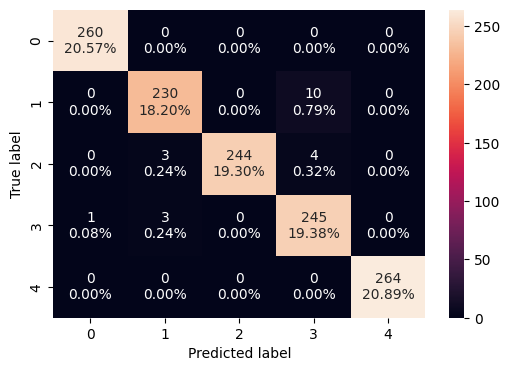

In [286]:
confusion_matrix_sklearn(rf_bow, X_train, y_train)  

* Here, 0 represents negative, 1 represents neutral, and 2 represents positive sentiment

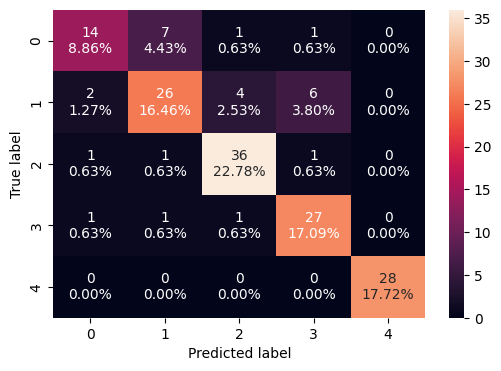

In [287]:
confusion_matrix_sklearn(rf_bow, X_valid, y_valid)

In [288]:
# Predicting on train data
y_pred_train_bow = rf_bow.predict(X_train_bow)

# Predicting on validation data
y_pred_valid_bow = rf_bow.predict(X_valid_bow)

**Classification report**

In [289]:
print(classification_report(y_train_bow, y_pred_train_bow))

              precision    recall  f1-score   support

           I       0.96      0.96      0.96       253
          II       0.91      0.87      0.89       253
         III       0.94      0.92      0.93       253
          IV       0.90      0.96      0.93       252
           V       1.00      1.00      1.00       253

    accuracy                           0.94      1264
   macro avg       0.94      0.94      0.94      1264
weighted avg       0.94      0.94      0.94      1264



In [290]:
print(classification_report(y_valid_bow, y_pred_valid_bow))

              precision    recall  f1-score   support

           I       0.97      0.97      0.97        31
          II       0.84      0.81      0.83        32
         III       0.93      0.90      0.92        31
          IV       0.85      0.91      0.88        32
           V       1.00      1.00      1.00        32

    accuracy                           0.92       158
   macro avg       0.92      0.92      0.92       158
weighted avg       0.92      0.92      0.92       158



- The model achieved an 88% recall score on the validation dataset.
- However, it failed to identify the negative and neutral reviews correctly in most cases.
- This might be due to the high imbalance of the target classes.







### Random Forest Model (default with Word2Vec)

In [292]:
X_word2vec = df_word2vec.copy()
#X_glove = df_glove.copy()
y = data['Accident Level']
y.shape

(425,)

In [293]:
#oversample = SMOTE()
#X=data['Description']
#y=data['Accident Level']
X_word2vec, y = oversample.fit_resample(X_word2vec, y)
y.shape

(1580,)

In [294]:
X_train_word2vec,X_valid_word2vec,X_test_word2vec,y_train_word2vec,y_valid_word2vec,y_test_word2vec=split(X_word2vec,y)
#X_train_glove,X_valid_glove,X_test_glove,y_train_glove,y_valid_glove,y_test_glove=split(X_glove,y)

In [295]:
# Building the model
rf_bow = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_bow.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(random_state=42)

**Confusion Matrix**

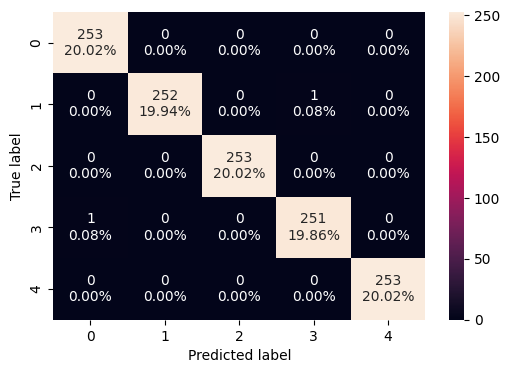

In [296]:
confusion_matrix_sklearn(rf_bow, X_train_word2vec, y_train_word2vec)

* Here, 0 represents negative, 1 represents neutral, and 2 represents positive sentiment

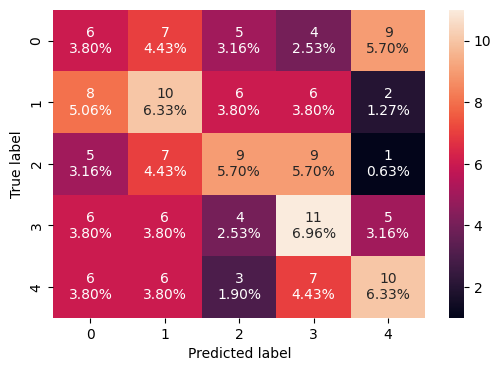

In [297]:
confusion_matrix_sklearn(rf_bow, X_valid_word2vec, y_valid_word2vec)

In [298]:
# Predicting on train data
y_pred_train_word2vec = rf_bow.predict(X_train_word2vec)

# Predicting on validation data
y_pred_valid_word2vec = rf_bow.predict(X_valid_word2vec)

**Classification report**

In [299]:
print(classification_report(y_train_word2vec, y_pred_train_word2vec))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00       253
          II       1.00      1.00      1.00       253
         III       1.00      1.00      1.00       253
          IV       1.00      1.00      1.00       252
           V       1.00      1.00      1.00       253

    accuracy                           1.00      1264
   macro avg       1.00      1.00      1.00      1264
weighted avg       1.00      1.00      1.00      1264



In [300]:
print(classification_report(y_valid_word2vec, y_pred_valid_word2vec))

              precision    recall  f1-score   support

           I       0.19      0.19      0.19        31
          II       0.28      0.31      0.29        32
         III       0.33      0.29      0.31        31
          IV       0.30      0.34      0.32        32
           V       0.37      0.31      0.34        32

    accuracy                           0.29       158
   macro avg       0.29      0.29      0.29       158
weighted avg       0.29      0.29      0.29       158



- The model achieved an 87% recall score on the validation dataset.
- However, it failed to identify the negative and neutral reviews correctly in most cases.
- This might be due to the high imbalance of the target classes.







### Random Forest Model (default with GloVe)

In [301]:
X_glove = df_glove.copy()
y = data['Accident Level']
y.shape

(425,)

In [302]:
X_glove, y = oversample.fit_resample(X_glove, y)
y.shape

(1580,)

In [303]:
X_train_glove,X_valid_glove,X_test_glove,y_train_glove,y_valid_glove,y_test_glove=split(X_glove,y)

In [304]:
# Building the model
rf_bow = RandomForestClassifier(random_state = 42)

# Fitting on train data
rf_bow.fit(X_train_glove, y_train_glove)

RandomForestClassifier(random_state=42)

**Confusion Matrix**

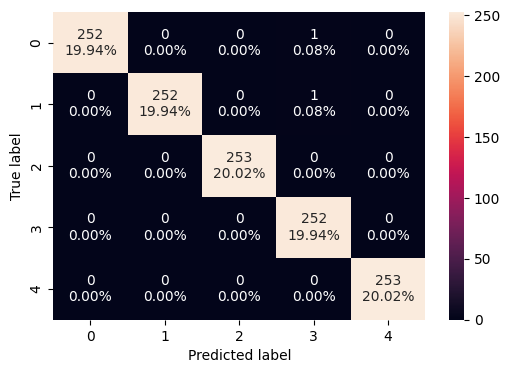

In [305]:
confusion_matrix_sklearn(rf_bow, X_train_glove, y_train_glove)

* Here, 0 represents negative, 1 represents neutral, and 2 represents positive sentiment

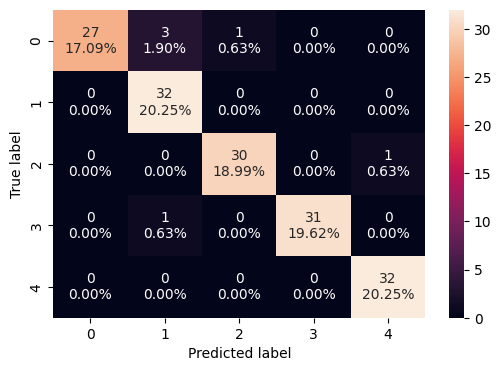

In [306]:
confusion_matrix_sklearn(rf_bow, X_valid_glove, y_valid_glove)

In [307]:
# Predicting on train data
y_pred_train_glove = rf_bow.predict(X_train_glove)

# Predicting on validation data
y_pred_valid_glove = rf_bow.predict(X_valid_glove)

**Classification report**

In [217]:
print(classification_report(y_train_glove, y_pred_train_glove))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00       248
          II       0.97      1.00      0.99        34
         III       1.00      1.00      1.00        26
          IV       1.00      0.92      0.96        26
           V       1.00      1.00      1.00         6

    accuracy                           0.99       340
   macro avg       0.99      0.98      0.99       340
weighted avg       0.99      0.99      0.99       340



In [308]:
print(classification_report(y_valid_glove, y_pred_valid_glove))

              precision    recall  f1-score   support

           I       1.00      0.87      0.93        31
          II       0.89      1.00      0.94        32
         III       0.97      0.97      0.97        31
          IV       1.00      0.97      0.98        32
           V       0.97      1.00      0.98        32

    accuracy                           0.96       158
   macro avg       0.97      0.96      0.96       158
weighted avg       0.97      0.96      0.96       158



- The model achieved an 87% recall score on the validation dataset.
- However, it failed to identify the negative and neutral reviews correctly in most cases.
- This might be due to the high imbalance of the target classes.







<font size=4>We'll try to address the class imbalance problem now.</font>

### Random Forest (with class_weights and BOW)

In [309]:
rf_bow_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_bow_balanced.fit(X_train_bow, y_train_bow)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Confusion Matrix**

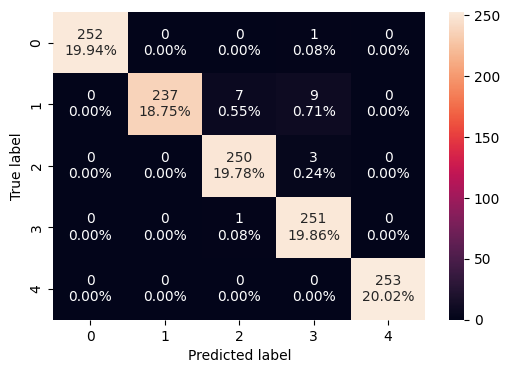

In [310]:
confusion_matrix_sklearn(rf_bow_balanced, X_train_bow, y_train_bow)

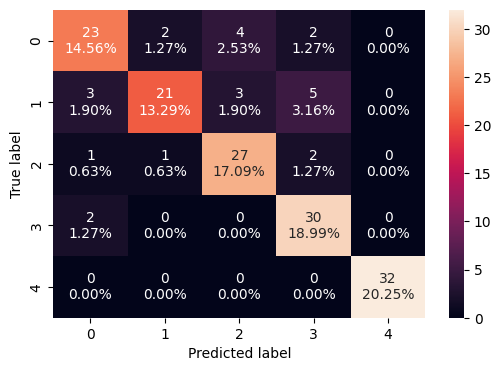

In [311]:
confusion_matrix_sklearn(rf_bow_balanced, X_valid_bow, y_valid_bow)

In [312]:
# Predicting on train data
y_pred_train_bow = rf_bow_balanced.predict(X_train_bow)

# Predicting on test data
y_pred_valid_bow = rf_bow_balanced.predict(X_valid_bow)

**Classification report**

In [313]:
print(classification_report(y_train_bow, y_pred_train_bow))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00       253
          II       1.00      0.94      0.97       253
         III       0.97      0.99      0.98       253
          IV       0.95      1.00      0.97       252
           V       1.00      1.00      1.00       253

    accuracy                           0.98      1264
   macro avg       0.98      0.98      0.98      1264
weighted avg       0.98      0.98      0.98      1264



In [314]:
print(classification_report(y_valid_bow, y_pred_valid_bow))

              precision    recall  f1-score   support

           I       0.79      0.74      0.77        31
          II       0.88      0.66      0.75        32
         III       0.79      0.87      0.83        31
          IV       0.77      0.94      0.85        32
           V       1.00      1.00      1.00        32

    accuracy                           0.84       158
   macro avg       0.85      0.84      0.84       158
weighted avg       0.85      0.84      0.84       158



- The model's performance has degraded slightly, and it is clear that overfitting is occurring as the model struggles to generalize on the validation dataset.
- We will now proceed to tune the model.







### Random Forest (with class_weights and Word2Vec)

In [315]:
rf_word2vec_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_word2vec_balanced.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Confusion Matrix**

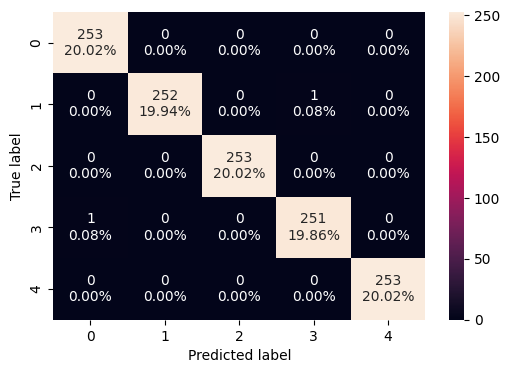

In [316]:
confusion_matrix_sklearn(rf_word2vec_balanced, X_train_word2vec, y_train_word2vec)

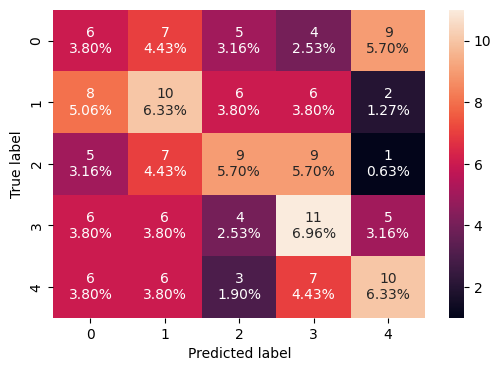

In [317]:
confusion_matrix_sklearn(rf_word2vec_balanced, X_valid_word2vec, y_valid_word2vec)

In [319]:
# Predicting on train data
y_pred_train = rf_word2vec_balanced.predict(X_train_word2vec)

# Predicting on test data
y_pred_valid = rf_word2vec_balanced.predict(X_valid_word2vec)

**Classification report**

In [320]:
print(classification_report(y_train_word2vec, y_pred_train_word2vec))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00       253
          II       1.00      1.00      1.00       253
         III       1.00      1.00      1.00       253
          IV       1.00      1.00      1.00       252
           V       1.00      1.00      1.00       253

    accuracy                           1.00      1264
   macro avg       1.00      1.00      1.00      1264
weighted avg       1.00      1.00      1.00      1264



In [321]:
print(classification_report(y_valid_word2vec, y_pred_valid_word2vec))

              precision    recall  f1-score   support

           I       0.19      0.19      0.19        31
          II       0.28      0.31      0.29        32
         III       0.33      0.29      0.31        31
          IV       0.30      0.34      0.32        32
           V       0.37      0.31      0.34        32

    accuracy                           0.29       158
   macro avg       0.29      0.29      0.29       158
weighted avg       0.29      0.29      0.29       158



- The model's performance has degraded slightly, and it is clear that overfitting is occurring as the model struggles to generalize on the validation dataset.
- We will now proceed to tune the model.







### Random Forest (with class_weights and GloVe)

In [322]:
rf_glove_balanced = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_glove_balanced.fit(X_train_glove, y_train_glove)

RandomForestClassifier(class_weight='balanced', random_state=42)

**Confusion Matrix**

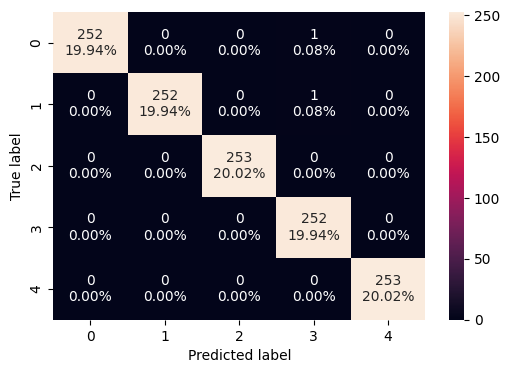

In [323]:
confusion_matrix_sklearn(rf_glove_balanced, X_train_glove, y_train_glove)

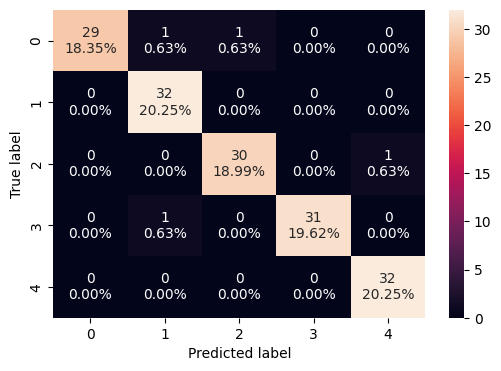

In [324]:
confusion_matrix_sklearn(rf_glove_balanced, X_valid_glove, y_valid_glove)

In [325]:
# Predicting on train data
y_pred_train = rf_glove_balanced.predict(X_train_glove)

# Predicting on test data
y_pred_valid = rf_glove_balanced.predict(X_valid_glove)

**Classification report**

In [326]:
print(classification_report(y_train_glove, y_pred_train_glove))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00       253
          II       1.00      1.00      1.00       253
         III       1.00      1.00      1.00       253
          IV       0.99      1.00      1.00       252
           V       1.00      1.00      1.00       253

    accuracy                           1.00      1264
   macro avg       1.00      1.00      1.00      1264
weighted avg       1.00      1.00      1.00      1264



In [327]:
print(classification_report(y_valid_glove, y_pred_valid_glove))

              precision    recall  f1-score   support

           I       1.00      0.87      0.93        31
          II       0.89      1.00      0.94        32
         III       0.97      0.97      0.97        31
          IV       1.00      0.97      0.98        32
           V       0.97      1.00      0.98        32

    accuracy                           0.96       158
   macro avg       0.97      0.96      0.96       158
weighted avg       0.97      0.96      0.96       158



- The model's performance has degraded slightly, and it is clear that overfitting is occurring as the model struggles to generalize on the validation dataset.








<font size=4>We will now proceed to tune the model.</font>

### Random Forest (with hyperparamter tuning and BOW)

In [328]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 15, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6, 7],
    "n_estimators": np.arange(30, 110, 10),
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_bow, y_train_bow)

In [329]:
# Creating a new model with the best combination of parameters
rf_bow_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_bow_tuned.fit(X_train_bow, y_train_bow)

RandomForestClassifier(class_weight='balanced', max_depth=14,
                       min_samples_split=5, n_estimators=80, random_state=42)

**Confusion Matrix**

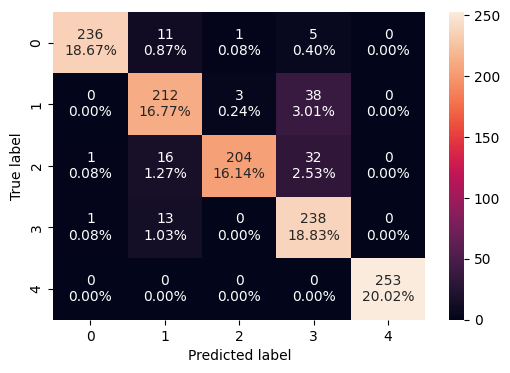

In [330]:
confusion_matrix_sklearn(rf_bow_tuned, X_train_bow, y_train_bow)

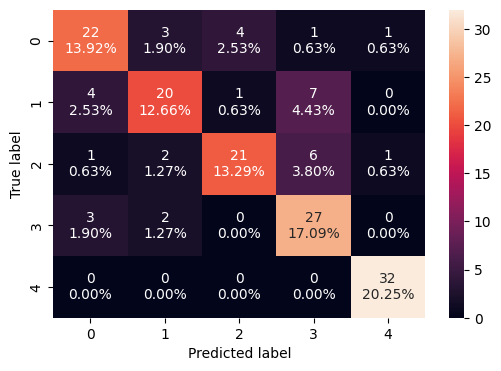

In [331]:
confusion_matrix_sklearn(rf_bow_tuned, X_valid_bow, y_valid_bow)

In [332]:
# Predicting on train data
y_pred_train_bow = rf_bow_tuned.predict(X_train_bow)

# Predicting on validation data
y_pred_valid_bow = rf_bow_tuned.predict(X_valid_bow)

**Classification report**

In [333]:
print(classification_report(y_train_bow, y_pred_train_bow))

              precision    recall  f1-score   support

           I       0.99      0.93      0.96       253
          II       0.84      0.84      0.84       253
         III       0.98      0.81      0.89       253
          IV       0.76      0.94      0.84       252
           V       1.00      1.00      1.00       253

    accuracy                           0.90      1264
   macro avg       0.91      0.90      0.91      1264
weighted avg       0.91      0.90      0.91      1264



In [334]:
print(classification_report(y_valid_bow, y_pred_valid_bow))

              precision    recall  f1-score   support

           I       0.73      0.71      0.72        31
          II       0.74      0.62      0.68        32
         III       0.81      0.68      0.74        31
          IV       0.66      0.84      0.74        32
           V       0.94      1.00      0.97        32

    accuracy                           0.77       158
   macro avg       0.78      0.77      0.77       158
weighted avg       0.78      0.77      0.77       158



### Random Forest (with hyperparameter tuning and Word2Vec)

In [335]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 15, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6, 7],
    "n_estimators": np.arange(30, 110, 10),
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_word2vec, y_train_word2vec)

In [336]:
# Creating a new model with the best combination of parameters
rf_word2vec_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_word2vec_tuned.fit(X_train_word2vec, y_train_word2vec)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_split=5, n_estimators=80, random_state=42)

**Confusion Matrix**

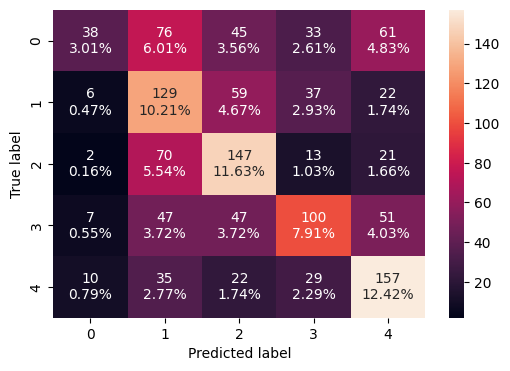

In [337]:
confusion_matrix_sklearn(rf_word2vec_tuned, X_train_word2vec, y_train_word2vec)

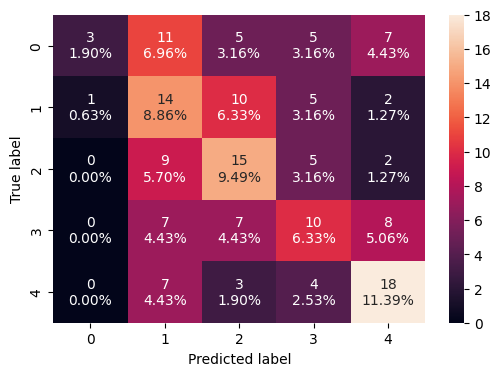

In [338]:
confusion_matrix_sklearn(rf_word2vec_tuned, X_valid_word2vec, y_valid_word2vec)

In [339]:
# Predicting on train data
y_pred_train_word2vec = rf_word2vec_tuned.predict(X_train_word2vec)

# Predicting on validation data
y_pred_valid_word2vec = rf_word2vec_tuned.predict(X_valid_word2vec)

**Classification report**

In [340]:
print(classification_report(y_train_word2vec, y_pred_train_word2vec))

              precision    recall  f1-score   support

           I       0.60      0.15      0.24       253
          II       0.36      0.51      0.42       253
         III       0.46      0.58      0.51       253
          IV       0.47      0.40      0.43       252
           V       0.50      0.62      0.56       253

    accuracy                           0.45      1264
   macro avg       0.48      0.45      0.43      1264
weighted avg       0.48      0.45      0.43      1264



In [341]:
print(classification_report(y_valid_word2vec, y_pred_valid_word2vec))

              precision    recall  f1-score   support

           I       0.75      0.10      0.17        31
          II       0.29      0.44      0.35        32
         III       0.38      0.48      0.42        31
          IV       0.34      0.31      0.33        32
           V       0.49      0.56      0.52        32

    accuracy                           0.38       158
   macro avg       0.45      0.38      0.36       158
weighted avg       0.45      0.38      0.36       158



### Random Forest (with hyperparametertuning and GloVe)

In [342]:
# Choose the type of classifier
rf_tuned = RandomForestClassifier(class_weight="balanced", random_state=42)

# defining the hyperparameter grid for tuning
parameters = {
    "max_depth": list(np.arange(4, 15, 2)),
    "max_features": ["sqrt", 0.5, 0.7],
    "min_samples_split": [5, 6, 7],
    "n_estimators": np.arange(30, 110, 10),
}

# defining the type of scoring used to compare parameter combinations
# we need to specify the mechanism of averaging as we have more than 2 target classes
scorer = metrics.make_scorer(metrics.recall_score, average='weighted')

# running the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_glove, y_train_glove)

In [352]:
# Creating a new model with the best combination of parameters
rf_glove_tuned = grid_obj.best_estimator_

# Fit the new model to the data
rf_glove_tuned.fit(X_train_glove, y_train_glove)

RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_split=5, random_state=42)

**Confusion Matrix**

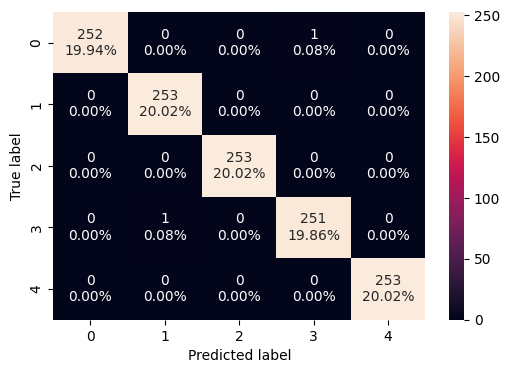

In [344]:
#Printing the confusion matrix
confusion_matrix_sklearn(rf_glove_tuned, X_train_glove, y_train_glove)

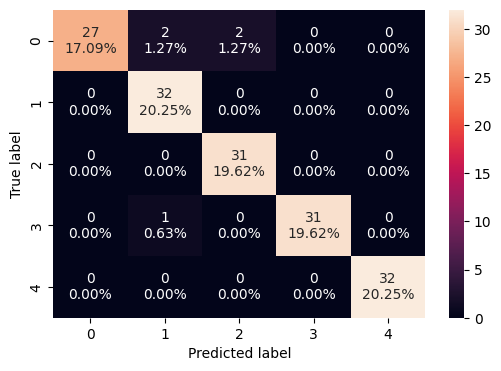

In [345]:
#Printing the confusion matrix
confusion_matrix_sklearn(rf_glove_tuned, X_valid_glove, y_valid_glove)

In [346]:
# Predicting on train data
y_pred_train_glove = rf_glove_tuned.predict(X_train_glove)

# Predicting on validation data
y_pred_valid_glove = rf_glove_tuned.predict(X_valid_glove)

**Classification report**

In [347]:
#Printing
print(classification_report(y_train_glove, y_pred_train_glove))

              precision    recall  f1-score   support

           I       1.00      1.00      1.00       253
          II       1.00      1.00      1.00       253
         III       1.00      1.00      1.00       253
          IV       1.00      1.00      1.00       252
           V       1.00      1.00      1.00       253

    accuracy                           1.00      1264
   macro avg       1.00      1.00      1.00      1264
weighted avg       1.00      1.00      1.00      1264



In [348]:
print(classification_report(y_valid_glove, y_pred_valid_glove))

              precision    recall  f1-score   support

           I       1.00      0.87      0.93        31
          II       0.91      1.00      0.96        32
         III       0.94      1.00      0.97        31
          IV       1.00      0.97      0.98        32
           V       1.00      1.00      1.00        32

    accuracy                           0.97       158
   macro avg       0.97      0.97      0.97       158
weighted avg       0.97      0.97      0.97       158



- Model after tuning is still overfitting a bit, but it is able to identify the negative and neutral sentiments better than before.

- We'll move ahead with the tuned Random Forest model with BOW encoding.

# Model Testing

We'll check the performance of the tuned RF model with BOW vectors on the test set.

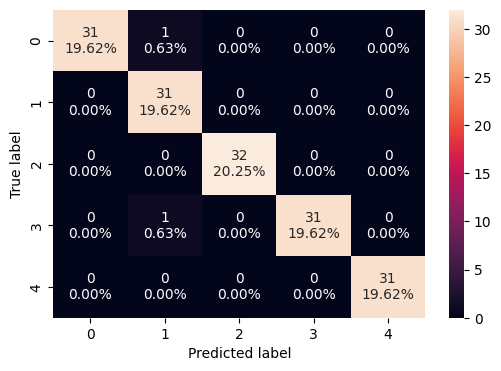

In [353]:
confusion_matrix_sklearn(rf_glove_tuned, X_test_glove, y_test_glove)

In [355]:
# Predicting on test data
y_pred_test_glove = rf_glove_tuned.predict(X_test_glove)

In [357]:
print(classification_report(y_test_glove, y_pred_test_glove))

              precision    recall  f1-score   support

           I       1.00      0.97      0.98        32
          II       0.94      1.00      0.97        31
         III       1.00      1.00      1.00        32
          IV       1.00      0.97      0.98        32
           V       1.00      1.00      1.00        31

    accuracy                           0.99       158
   macro avg       0.99      0.99      0.99       158
weighted avg       0.99      0.99      0.99       158



- The model achieved a recall of 99% on the test dataset.

# Conclusion